<a href="https://colab.research.google.com/github/satyhim/Capstone-Project-Predicting-sentiment-of-COVID-19-tweets/blob/main/Rough1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sentiment Analysis : Predicting sentiment of COVID-19 tweets</u></b>

## <b> Problem Description </b>

### This challenge asks you to build a classification model to predict the sentiment of COVID-19 tweets.The tweets have been pulled from Twitter and manual tagging has been done then.

### The names and usernames have been given codes to avoid any privacy concerns.

### You are given the following information:
1. Location
2. Tweet At
3. Original Tweet
4. Label

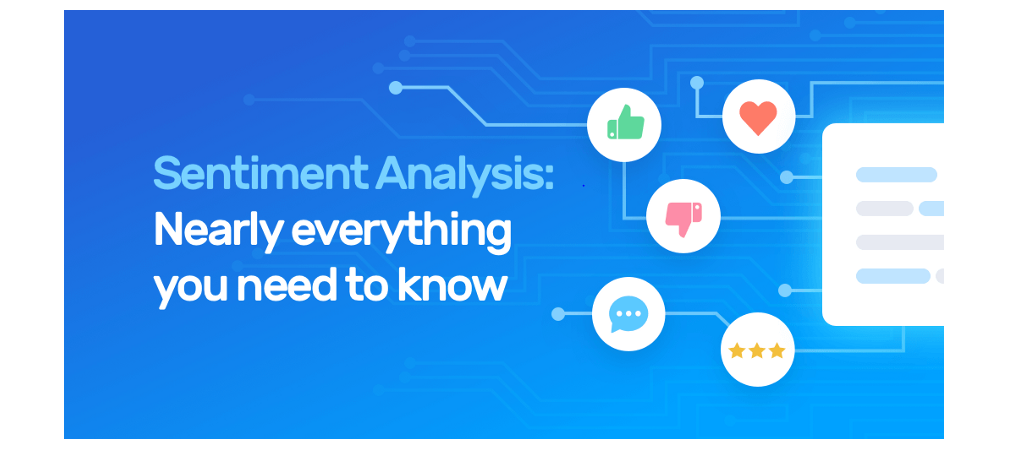

COVID-19 originally known as Corona VIrus Disease of 2019, has been declared as a pandemic by World Health Organization (WHO) on 11th March 2020. Unprecedented pressures have mounted on each country to make compelling requisites for controlling the population by assessing the cases and properly utilizing available resources. The rapid number of exponential cases globally has become the apprehension of panic, fear and anxiety among people. The mental and physical health of the global population is found to be directly proportional to this pandemic disease. It is the need of the hour to implement different measures to safeguard the countries by demystifying the pertinent facts and information.

# Workflow

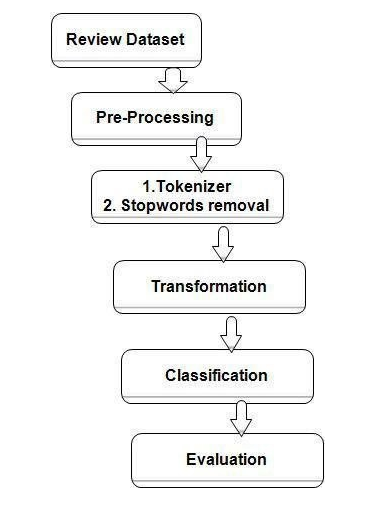

#**1.Lets Invite Some Libraries.**

In [3]:
import pandas as pd
import numpy as np
from numpy import percentile
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import re # for regular expressions
import pandas as pd 
pd.set_option("display.max_colwidth", 200) 
import string
import nltk # for text manipulation
from nltk.stem.porter import *
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from tqdm import tqdm
from gensim.models.doc2vec import LabeledSentence
import gensim
from sklearn.linear_model import LogisticRegression
from scipy import stats 
from sklearn import metrics 
from sklearn.metrics import mean_squared_error,mean_absolute_error, make_scorer,classification_report,confusion_matrix,accuracy_score,roc_auc_score,roc_curve
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.naive_bayes import BernoulliNB
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import xgboost as xgb
import warnings 
warnings.filterwarnings("ignore")

%matplotlib inline

In [4]:
working_dir_path = '/content/drive/MyDrive/Python/Project/NLP_Covid19_tweet/Copy of Coronavirus Tweets.csv'
df = pd.read_csv(working_dir_path,encoding = 'latin')

# **2. Reviewing Our Dataset**

In [5]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,2/3/2020,"TRENDING: New Yorkers encounter empty supermarket shelves (pictured, Wegmans in Brooklyn), sold-out online grocers (FoodKick, MaxDelivery) as #coronavirus-fearing shoppers stock up https://t.co/Gr...",Extremely Negative
1,2,44954,"Seattle, WA",2/3/2020,"When I couldn't find hand sanitizer at Fred Meyer, I turned to #Amazon. But $114.97 for a 2 pack of Purell??!!Check out how #coronavirus concerns are driving up prices. https://t.co/ygbipBflMY",Positive
2,3,44955,NaN,2/3/2020,Find out how you can protect yourself and loved ones from #coronavirus. ?,Extremely Positive
3,4,44956,Chicagoland,2/3/2020,#Panic buying hits #NewYork City as anxious shoppers stock up on food&amp;medical supplies after #healthcare worker in her 30s becomes #BigApple 1st confirmed #coronavirus patient OR a #Bloomberg ...,Negative
4,5,44957,"Melbourne, Victoria",3/3/2020,#toiletpaper #dunnypaper #coronavirus #coronavirusaustralia #CoronaVirusUpdate #Covid_19 #9News #Corvid19 #7NewsMelb #dunnypapergate #Costco One week everyone buying baby milk powder the next ...,Neutral


In [6]:
# There are null values in location column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41158 entries, 0 to 41157
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41158 non-null  int64 
 1   ScreenName     41158 non-null  int64 
 2   Location       32497 non-null  object
 3   TweetAt        41158 non-null  object
 4   OriginalTweet  41158 non-null  object
 5   Sentiment      41158 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [7]:
# There 41157 rows and 6 columns in our database
df.shape

(41158, 6)

In [8]:
# Names Of columns in our dataset
df.columns

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment'],
      dtype='object')

In [9]:
# All tweets came only from March and April month of 2020.
df.TweetAt.value_counts()

20-03-2020    3448
19-03-2020    3215
25-03-2020    2979
21-03-2020    2653
22-03-2020    2114
23-03-2020    2062
8/4/2020      1881
7/4/2020      1843
6/4/2020      1742
18-03-2020    1578
24-03-2020    1480
9/4/2020      1471
13-04-2020    1428
26-03-2020    1277
13-03-2020    1233
5/4/2020      1131
10/4/2020     1005
2/4/2020       954
11/4/2020      909
3/4/2020       810
12/4/2020      803
4/4/2020       767
12/3/2020      685
1/4/2020       630
14-03-2020     614
15-03-2020     519
16-03-2020     472
27-03-2020     345
31-03-2020     316
14-04-2020     284
11/3/2020      165
29-03-2020     125
30-03-2020      87
10/3/2020       54
28-03-2020      23
9/3/2020        16
8/3/2020         9
4/3/2020         8
7/3/2020         7
5/3/2020         6
3/3/2020         4
2/3/2020         4
6/3/2020         2
Name: TweetAt, dtype: int64

In [10]:
# There are 12220 unique locations from where the tweets came.
df['Location'].value_counts()

United States                   556
London, England                 527
London                          516
New York, NY                    400
Washington, DC                  360
                               ... 
Los Angeles, CA USA               1
RGANG                             1
On a Plane                        1
France, l'union europeenne        1
i love you so much || he/him      1
Name: Location, Length: 12224, dtype: int64

In [11]:
# There are 5 unique sentiment types in our dataset
df['Sentiment'].value_counts()

Positive              11344
Negative               9989
Neutral                7673
Extremely Positive     6664
Extremely Negative     5488
Name: Sentiment, dtype: int64

# Going deeper into tweet and sentiment.

In [12]:
df[df['Sentiment']=='Extremely Negative']

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,2/3/2020,"TRENDING: New Yorkers encounter empty supermarket shelves (pictured, Wegmans in Brooklyn), sold-out online grocers (FoodKick, MaxDelivery) as #coronavirus-fearing shoppers stock up https://t.co/Gr...",Extremely Negative
8,9,44961,NaN,4/3/2020,"HI TWITTER! I am a pharmacist. I sell hand sanitizer for a living! Or I do when any exists. Like masks, it is sold the fuck out everywhere. SHOULD YOU BE WORRIED? No. Use soap. SHOULD YOU VISIT TW...",Extremely Negative
11,12,44964,New Delhi,4/3/2020,"Beware of counterfeits trying to sell fake masks at cheap prices. Let's defeat coronavirus threat, #Covid_19 collectively. #BeSafe #BeACascader #CoronavirusReachesDelhi \r\r\n#coronavirusindia \r\...",Extremely Negative
12,13,44965,"USA, PA",4/3/2020,"Panic food buying in Germany due to #coronavirus has begun. But the #organic is left behind! #Hamsterkauf\r\r\n\r\r\nPanic buying is called ""Hamster purchases""(HamsterkÃ¤ufe) in German, taken fro...",Extremely Negative
15,16,44968,Bengaluru,4/3/2020,#AirSewa \r\r\n\r\r\n@flyspicejet is not providing #webchecin customers free seats.\r\r\n\r\r\nPassengers are forced to choose paid seats as free seats are made available only at airport counter. ...,Extremely Negative
...,...,...,...,...,...,...
41116,44914,89866,NaN,14-04-2020,"Food Banks are not equipped for a 30% unemployment rate. The federal government must provide direct aid to everyone, very quickly.\r\r\n\r\r\n""The Coronavirus Food Bank Crisis Is Already Underway""...",Extremely Negative
41129,44927,89879,"Melbourne, Australia",14-04-2020,"The COVID-19 pandemic and global oil price wars are having an economic impact worldwide, but one consequence is lower fuel prices at Australian petrol pumps for the foreseeable.\r\r\n\r\r\n#UniMel...",Extremely Negative
41131,44929,89881,NaN,14-04-2020,Squeo works in the meat department of a Kroger supermarket in Michigan. He knows of several grocery workers whoÂve tested positive for COVID-19 and one in his area who died. He worries that the b...,Extremely Negative
41134,44932,89884,Austria,14-04-2020,A Singaporean politician who slammed a woman snapped with seven supermarket trolleys during COVID-19 lockdown has been forced to eat humble pie after it turned out she was donating goods to the po...,Extremely Negative


In [13]:
df[df['Sentiment']=='Negative']

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
3,4,44956,Chicagoland,2/3/2020,#Panic buying hits #NewYork City as anxious shoppers stock up on food&amp;medical supplies after #healthcare worker in her 30s becomes #BigApple 1st confirmed #coronavirus patient OR a #Bloomberg ...,Negative
20,21,44973,Malta,5/3/2020,"#CoronaVirus #COVID_19 People are starting to become frightened and to do #PanicShopping. Many shelves, meanwhile, turn empty as #goods are sold. #FaceMasks &amp; disinfection liquid are sold out,...",Negative
26,27,44979,"Bondi Beach, Sydney",7/3/2020,When your usual grocery shopping @woolworths turns into a toilet paper fight in the supermarket aisle. Yikes. #toiletpaperpanic for the #coronavirus has taken a whole new level. https://t.co/aKJ28...,Negative
27,28,44980,NaN,7/3/2020,Coronavirus panic spreads: Costco is pulling free samples over COVID-19 - USA TODAY\r\r\n\r\r\nCoronavirus panic spreads: Costco is pulling free samples over COVID-19Â Â USA TODAY\r\r\n\r\r\n'It's...,Negative
28,29,44981,NaN,7/3/2020,"While you are stocking up, waiting for quarantine, if you can don't forget to donate food, water, and toiletries to your local food banks to help others without the means to stock up. Get ahead o...",Negative
...,...,...,...,...,...,...
41128,44926,89878,NaN,14-04-2020,Today at the grocery store I saw someone getting a case of #Corona beer and I was about to jokingly say 'hey man i see you got Corona' then I stopped myself doing that thinking it would be the new...,Negative
41132,44930,89882,"Accra, Ghana",14-04-2020,"In every human affliction there are gainers and losers. In this case of Covid 19, the TELECOS are gaining beyond expectations. The level of internet being used at this moment is mind blowing. Gov...",Negative
41148,44946,89898,"Brooklyn, NY",14-04-2020,YÂall really shitting that much more at home?? #COVID19 #coronavirus #toiletpaper,Negative
41150,44948,89900,"Toronto, Ontario",14-04-2020,"Still shocked by the number of #Toronto supermarket employees working without some sort of mask. We all know by now, employees can be asymptomatic while spreading #coronavirus .",Negative


In [14]:
df[df['Sentiment']=='Neutral']

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
4,5,44957,"Melbourne, Victoria",3/3/2020,#toiletpaper #dunnypaper #coronavirus #coronavirusaustralia #CoronaVirusUpdate #Covid_19 #9News #Corvid19 #7NewsMelb #dunnypapergate #Costco One week everyone buying baby milk powder the next ...,Neutral
5,6,44958,Los Angeles,3/3/2020,Do you remember the last time you paid $2.99 a gallon for regular gas in Los Angeles?Prices at the pump are going down. A look at how the #coronavirus is impacting prices. 4pm @ABC7 https://t.co/P...,Neutral
7,8,44960,"Geneva, Switzerland",3/3/2020,"@DrTedros ""We canÂt stop #COVID19 without protecting #healthworkers.\r\r\nPrices of surgical masks have increased six-fold, N95 respirators have more than trebled &amp; gowns cost twice as much""-...",Neutral
17,18,44970,"Toronto, Ontario",5/3/2020,"When youÂre stockpiling food &amp; other supplies, buy extra for your local food bank. Many families donÂt have the luxury to spend beyond their weekly budget. @DailyBreadTO #coronavirus",Neutral
34,35,44987,"Angmering, West Sussex",8/3/2020,So not due to #Brexit at all then &gt;&gt; Supermarkets begin #foodrationing after wave of #coronavirus-fuelled panic buying https://t.co/AKgkHxO0tW,Neutral
...,...,...,...,...,...,...
41142,44940,89892,India,14-04-2020,#Coronavirus ?? ????? ??? ????? ?? ??? ??????? ?? ????? ???? ?? ?? ??? ??? ?? ??? ?? ??????? ???? ??? ???????????? @narendramodi ?? ??? ????? ?? ????? ???? ?? ????\r\r\n#ATCard #StayHome #Lockdown...,Neutral
41144,44942,89894,In burning hell.,14-04-2020,https://t.co/8s4vKvcO1r #5gtowers?? #EcuadorUnido #cruiseships #SaveTheChildren #wuhan #BillGates?#SocialDistance #coronavirus is caused by #cellpoisoning from #radiation #cancer #exosomes #youcan...,Neutral
41145,44943,89895,NaN,14-04-2020,@_Sunrise_SV @Gamzap @NPR What does not having a supermarket nearby have to do with getting COVID-19?,Neutral
41153,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket shelves in #NZ lockdown #COVID-19 https://t.co/cz89uA0HNp,Neutral


In [15]:
df[df['Sentiment']=='Neutral'].loc[17,'OriginalTweet']

'When youÂ\x92re stockpiling food &amp; other supplies, buy extra for your local food bank. Many families donÂ\x92t have the luxury to spend beyond their weekly budget. @DailyBreadTO  #coronavirus'

In [16]:
df[df['Sentiment']=='Positive']

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
1,2,44954,"Seattle, WA",2/3/2020,"When I couldn't find hand sanitizer at Fred Meyer, I turned to #Amazon. But $114.97 for a 2 pack of Purell??!!Check out how #coronavirus concerns are driving up prices. https://t.co/ygbipBflMY",Positive
6,7,44959,NaN,3/3/2020,Voting in the age of #coronavirus = hand sanitizer ? #SuperTuesday https://t.co/z0BeL4O6Dk,Positive
10,11,44963,"Boksburg, South Africa",4/3/2020,Best quality couches at unbelievably low prices available to order.\r\r\n\r\r\nWe are in Boksburg GP \r\r\n\r\r\nFor more info WhatsApp:\r\r\n084 764 8086\r\r\n\r\r\n#SuperTuesdsy #PowerTalk \r\r\...,Positive
14,15,44967,"Washington, DC",4/3/2020,"While we were busy watching election returns and bracing for a Covid-19 outbreak, Trump nominated a chemical-industry lobbyist to head the Consumer Product Safety Commission https://t.co/M2ShHI1Tn0",Positive
18,19,44971,NaN,5/3/2020,"That's about a week from now. A bit optimistic. Probably it will take another month. Supply chain may be recovering, demand chain will be non-existent in US and Europe for the next month or two....",Positive
...,...,...,...,...,...,...
41141,44939,89891,Pakistan,14-04-2020,Good News! \r\r\nWe'll Soon Announce Our High Tech G&amp;G Online &amp; Live Course for Covid-19 effected Countries in very low prices. \r\r\nTitle: How to Approach Shale Reservoirs\r\r\nSpeaker: ...,Positive
41146,44944,89896,"Manhattan, NY",14-04-2020,How exactly are we going to re-open New York City if we still can't buy any hand sanitizer? #coronavirus,Positive
41147,44945,89897,"Gurgaon, India",14-04-2020,"#Gold prices rose to a more than 7-year high today due to #coronavirus increased bullion's #safe-haven appeal.\r\r\nIt gained 0.1% to $1,715.25/ounce , having touched its highest since Dec. 2012 a...",Positive
41151,44949,89901,OHIO,14-04-2020,"I never that weÂd be in a situation &amp; world that going to the supermarket , picking up a package or my mail is like playing Russian roulette with my life #coronavirus #StayHome #SocialDistancing",Positive


In [17]:
df[df['Sentiment']=='Positive'].loc[1,'OriginalTweet']

"When I couldn't find hand sanitizer at Fred Meyer, I turned to #Amazon. But $114.97 for a 2 pack of Purell??!!Check out how  #coronavirus concerns are driving up prices. https://t.co/ygbipBflMY"

In [18]:
df[df['Sentiment']=='Positive'].loc[6,'OriginalTweet']

'Voting in the age of #coronavirus = hand sanitizer ? #SuperTuesday https://t.co/z0BeL4O6Dk'

In [19]:
df[df['Sentiment']=='Extremely Positive']

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
2,3,44955,NaN,2/3/2020,Find out how you can protect yourself and loved ones from #coronavirus. ?,Extremely Positive
9,10,44962,"Dublin, Ireland",4/3/2020,"Anyone been in a supermarket over the last few days? Went to do my NORMAL shop last night &amp; ??is the sight that greeted me. Barmy! (Btw, whatÂs so special about tinned tomatoes? ????????????)...",Extremely Positive
13,14,44966,NaN,4/3/2020,"#Covid_19 Went to the Grocery Store, turns out all cleaning supplies have been bought out for fear of Coronavirus.\r\r\n\r\r\nMy daughter's substitute teacher showed her class how to make hand san...",Extremely Positive
16,17,44969,Mumbai,5/3/2020,"What Precautionary measures have you all taken in your respective Restaurants and Hotels, Comment below...\r\r\n#COVID-19 #Coronavirus\r\r\n\r\r\nCOVID-19: Hotel chains enforce precautionary measu...",Extremely Positive
19,20,44972,Tallahassee,5/3/2020,"Studies show the #coronavirus like #COVID19 can live up to nine days on hard surfaces like metal, plastic, and glass.\r\r\n\r\r\nOur Deputy Commissioner of Consumer Affairs Mary Barzee Flores show...",Extremely Positive
...,...,...,...,...,...,...
41138,44936,89888,"LES, NYC",14-04-2020,Distilleries have switched portions of their production from alcohol to hand sanitizer to help with,Extremely Positive
41139,44937,89889,"Los Angeles, CA",14-04-2020,HMU FOR PRICES!! Got great deals going right now. #weedsmokers #StonerFam #420 #bud #Gas #FullSend #Nelkboys #coronavirus #StimulusChecks #ListenToYourHeart https://t.co/mDMgkOQ8m3,Extremely Positive
41143,44941,89893,Juba south sudan,14-04-2020,@MajangChien @MTNSSD @MTNSSD is worst than COVID-19. All businesses have reduced their prices but our MTN is looting us instead of giving us free data.,Extremely Positive
41149,44947,89899,NaN,14-04-2020,"UV light Sterilizer Sanitizer for your mask and mobile phone ?, pls take care, be safe. #sanitizer #sanitizers #corona #coronavirus #coronavÃ­rus #coronavirÃ¼s https://t.co/v8XDXhqeYN",Extremely Positive


In [20]:
df[df['Sentiment']=='Extremely Positive'].loc[22,'OriginalTweet']

'Control over stocks and gold is lost...gold coming back very nicely! Loves wallbridge and Balmoral and warns listeners about #coronavirus Sprott Money Ltd. recently put in money to $OCG $GENM $MMG and many more... https://t.co/3aURZ2e4Sj'

In [21]:
pd.isnull(df["Sentiment"])


0        False
1        False
2        False
3        False
4        False
         ...  
41153    False
41154    False
41155    False
41156    False
41157    False
Name: Sentiment, Length: 41158, dtype: bool

# Looking For Null Values

Only Location column contains 28% null values. But this column is not useful for our sentiment analysis.Hence we will neglect these null values.

In [22]:
missing_values = pd.DataFrame()
missing_values['column'] = df.columns

missing_values['percent'] = [round(100* df[col].isnull().sum() / len(df), 2) for col in df.columns]
missing_values = missing_values.sort_values('percent')
missing_values = missing_values[missing_values['percent']>0]

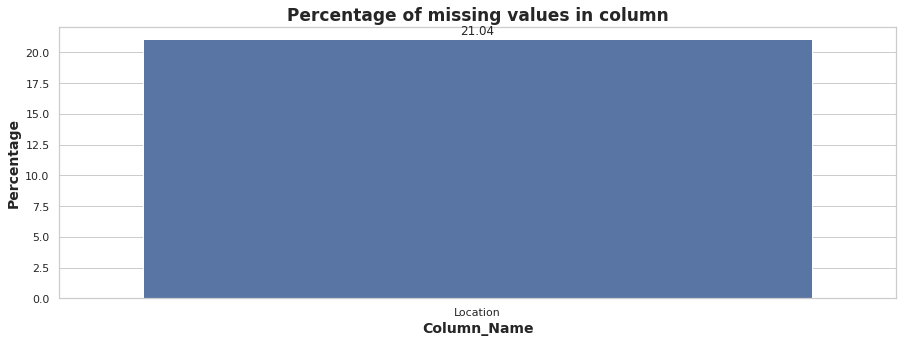

In [23]:
plt.figure(figsize=(15, 5))
sns.set(style='whitegrid', color_codes=True)
splot=sns.barplot(x='column', y='percent', data=missing_values)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
                   va = 'center', xytext = (0, 9), textcoords = 'offset points')
plt.xlabel("Column_Name", size=14, weight="bold")
plt.ylabel("Percentage", size=14, weight="bold")
plt.title("Percentage of missing values in column",fontweight="bold",size=17)
plt.show()


# Heat Map for missing values

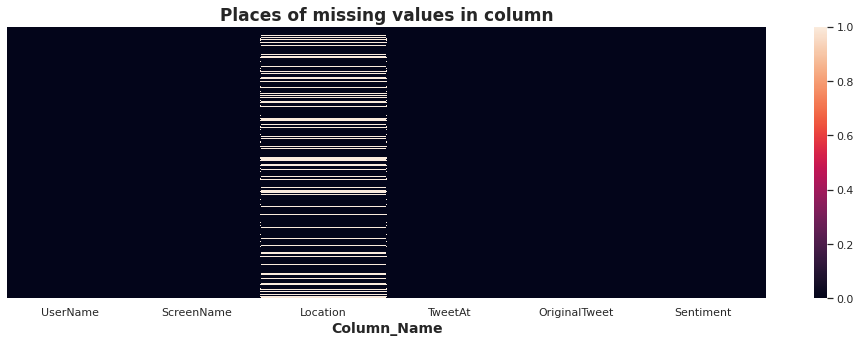

In [24]:
plt.figure(figsize=(17, 5))
sns.heatmap(df.isnull(), cbar=True, yticklabels=False)
plt.xlabel("Column_Name", size=14, weight="bold")
plt.title("Places of missing values in column",fontweight="bold",size=17)
plt.show()

# Unique Values In Each Feature Coulmn

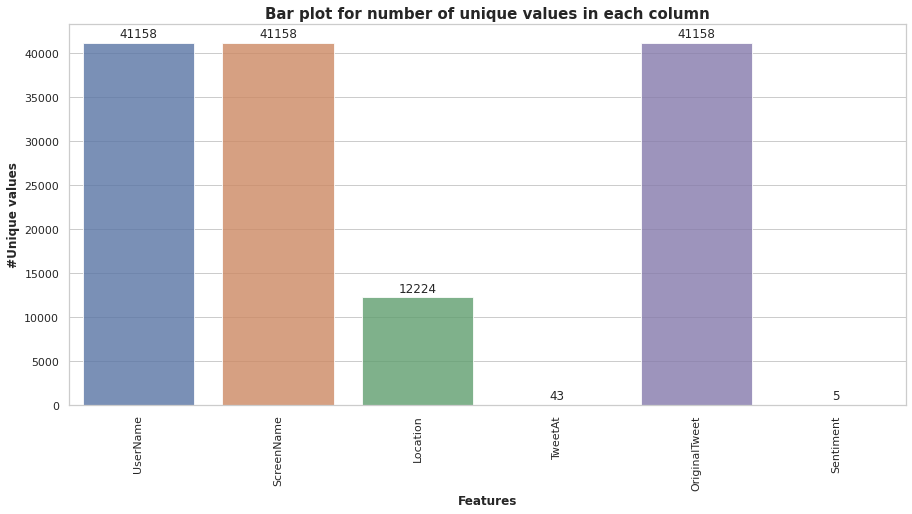

In [25]:
unique_df = pd.DataFrame()
unique_df['Features'] = df.columns
unique=[]
for i in df.columns:
    unique.append(df[i].nunique())
unique_df['Uniques'] = unique

f, ax = plt.subplots(1,1, figsize=(15,7))

splot = sns.barplot(x=unique_df['Features'], y=unique_df['Uniques'], alpha=0.8)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
                   va = 'center', xytext = (0, 9), textcoords = 'offset points')
plt.title('Bar plot for number of unique values in each column',weight='bold', size=15)
plt.ylabel('#Unique values', size=12, weight='bold')
plt.xlabel('Features', size=12, weight='bold')
plt.xticks(rotation=90)
plt.show()

# Plot Of Top 15 Locations Of Tweet.

In [26]:
loc_analysis = pd.DataFrame(df['Location'].value_counts().sort_values(ascending=False))
loc_analysis = loc_analysis.rename(columns={'Location':'count'})

In [27]:
import plotly.graph_objects as go


In [28]:
data = {
   "values": loc_analysis['count'][:15],
   "labels": loc_analysis.index[:15],
   "domain": {"column": 0},
   "name": "Location Name",
   "hoverinfo":"label+percent+name",
   "hole": .4,
   "type": "pie"
}
layout = go.Layout(title="<b>Ratio on Location</b>", legend=dict(x=0.1, y=1.1, orientation="h"))

data = [data]
fig = go.Figure(data = data, layout = layout)
fig.update_layout(title_x=0.5)
fig.show()

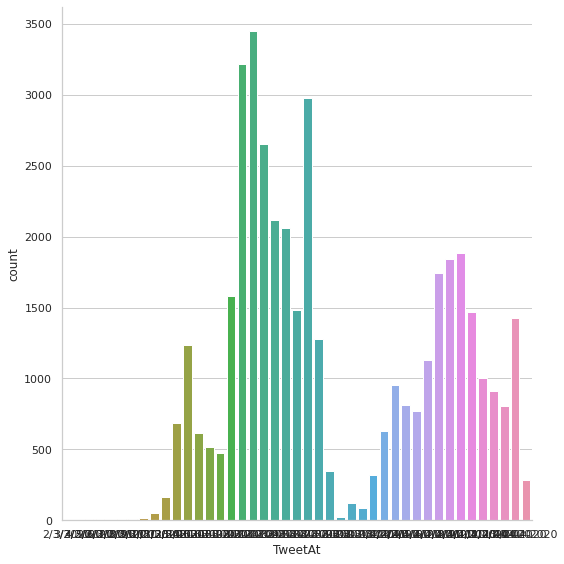

In [29]:
sns.catplot("TweetAt", data=df, kind="count", height=8)

# Top 10 locations of tweet

In [30]:
Top_Location_Of_tweet= df['Location'].value_counts().head(10)

sns.set(rc={'figure.figsize':(12,8)})
sns.set_style('white')

In [31]:
Top_Location_Of_tweet.head(10)

United States      556
London, England    527
London             516
New York, NY       400
Washington, DC     360
United Kingdom     331
Los Angeles, CA    283
India              265
UK                 229
USA                222
Name: Location, dtype: int64

In [32]:
Top_Location_Of_tweet_df=pd.DataFrame(Top_Location_Of_tweet)
Top_Location_Of_tweet_df.reset_index(inplace=True)
Top_Location_Of_tweet_df.rename(columns={'index':'Location', 'Location':'Location_Count'}, inplace=True)
Top_Location_Of_tweet_df

,Location,Location_Count
0,United States,556
1,"London, England",527
2,London,516
3,"New York, NY",400
4,"Washington, DC",360
5,United Kingdom,331
6,"Los Angeles, CA",283
7,India,265
8,UK,229
9,USA,222


[Text(0, 0, 'United States'),
 Text(0, 0, 'London, England'),
 Text(0, 0, 'London'),
 Text(0, 0, 'New York, NY'),
 Text(0, 0, 'Washington, DC'),
 Text(0, 0, 'United Kingdom'),
 Text(0, 0, 'Los Angeles, CA'),
 Text(0, 0, 'India'),
 Text(0, 0, 'UK'),
 Text(0, 0, 'USA')]

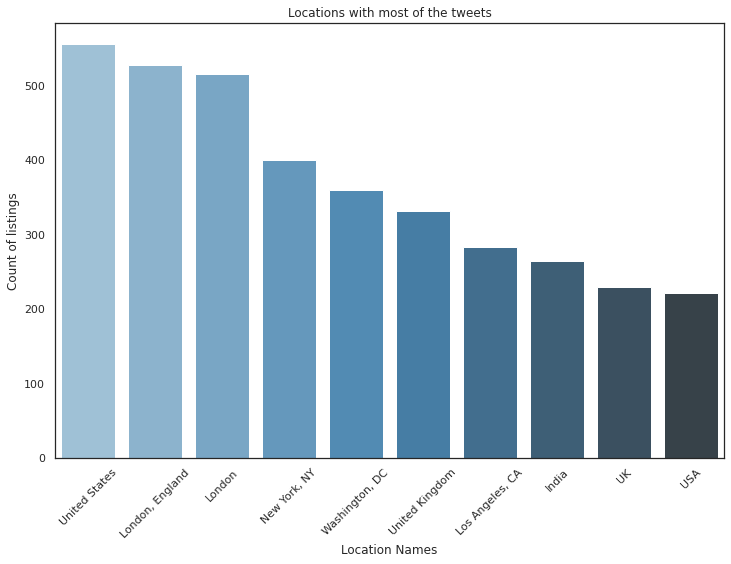

In [33]:
viz_1=sns.barplot(x="Location", y="Location_Count", data=Top_Location_Of_tweet_df,
                 palette='Blues_d')
viz_1.set_title('Locations with most of the tweets')
viz_1.set_ylabel('Count of listings')
viz_1.set_xlabel('Location Names')
viz_1.set_xticklabels(viz_1.get_xticklabels(), rotation=45)

# Sentiments Countplot

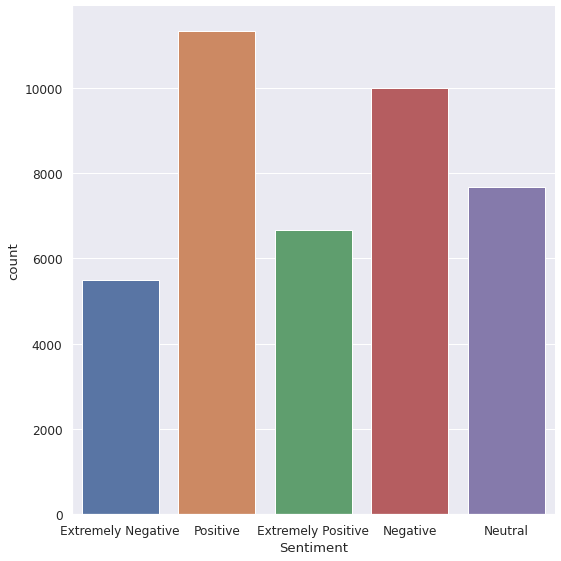

In [34]:
sns.set(font_scale=1.1)
sns.catplot("Sentiment", data=df, kind="count", height=8)

In [35]:
df.TweetAt.value_counts()

20-03-2020    3448
19-03-2020    3215
25-03-2020    2979
21-03-2020    2653
22-03-2020    2114
23-03-2020    2062
8/4/2020      1881
7/4/2020      1843
6/4/2020      1742
18-03-2020    1578
24-03-2020    1480
9/4/2020      1471
13-04-2020    1428
26-03-2020    1277
13-03-2020    1233
5/4/2020      1131
10/4/2020     1005
2/4/2020       954
11/4/2020      909
3/4/2020       810
12/4/2020      803
4/4/2020       767
12/3/2020      685
1/4/2020       630
14-03-2020     614
15-03-2020     519
16-03-2020     472
27-03-2020     345
31-03-2020     316
14-04-2020     284
11/3/2020      165
29-03-2020     125
30-03-2020      87
10/3/2020       54
28-03-2020      23
9/3/2020        16
8/3/2020         9
4/3/2020         8
7/3/2020         7
5/3/2020         6
3/3/2020         4
2/3/2020         4
6/3/2020         2
Name: TweetAt, dtype: int64

# Data Preprocessing

**A) Removing @user**

In [36]:
# write function for removing @user
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i,'',input_txt)
    return input_txt

In [37]:
# create new column with removed @user
df['Tweet'] = np.vectorize(remove_pattern)(df['OriginalTweet'], '@[\w]*')

In [38]:
df.head(2)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Tweet
0,1,44953,NYC,2/3/2020,"TRENDING: New Yorkers encounter empty supermarket shelves (pictured, Wegmans in Brooklyn), sold-out online grocers (FoodKick, MaxDelivery) as #coronavirus-fearing shoppers stock up https://t.co/Gr...",Extremely Negative,"TRENDING: New Yorkers encounter empty supermarket shelves (pictured, Wegmans in Brooklyn), sold-out online grocers (FoodKick, MaxDelivery) as #coronavirus-fearing shoppers stock up https://t.co/Gr..."
1,2,44954,"Seattle, WA",2/3/2020,"When I couldn't find hand sanitizer at Fred Meyer, I turned to #Amazon. But $114.97 for a 2 pack of Purell??!!Check out how #coronavirus concerns are driving up prices. https://t.co/ygbipBflMY",Positive,"When I couldn't find hand sanitizer at Fred Meyer, I turned to #Amazon. But $114.97 for a 2 pack of Purell??!!Check out how #coronavirus concerns are driving up prices. https://t.co/ygbipBflMY"


**REMOVED HTTP AND URLS FROM TWEET**

In [39]:
import re
df['Tweet'] = df['Tweet'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])

In [40]:
df.head(3)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Tweet
0,1,44953,NYC,2/3/2020,"TRENDING: New Yorkers encounter empty supermarket shelves (pictured, Wegmans in Brooklyn), sold-out online grocers (FoodKick, MaxDelivery) as #coronavirus-fearing shoppers stock up https://t.co/Gr...",Extremely Negative,"TRENDING: New Yorkers encounter empty supermarket shelves (pictured, Wegmans in Brooklyn), sold-out online grocers (FoodKick, MaxDelivery) as #coronavirus-fearing shoppers stock up"
1,2,44954,"Seattle, WA",2/3/2020,"When I couldn't find hand sanitizer at Fred Meyer, I turned to #Amazon. But $114.97 for a 2 pack of Purell??!!Check out how #coronavirus concerns are driving up prices. https://t.co/ygbipBflMY",Positive,"When I couldn't find hand sanitizer at Fred Meyer, I turned to #Amazon. But $114.97 for a 2 pack of Purell??!!Check out how #coronavirus concerns are driving up prices."
2,3,44955,NaN,2/3/2020,Find out how you can protect yourself and loved ones from #coronavirus. ?,Extremely Positive,Find out how you can protect yourself and loved ones from #coronavirus. ?


**B) Removing Punctuations, Numbers, and Special Characters**

In [41]:
# remove special characters, numbers, punctuations
df['Tweet'] = df['Tweet'].str.replace('[^a-zA-Z#]+',' ')

In [42]:
df.head(5)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Tweet
0,1,44953,NYC,2/3/2020,"TRENDING: New Yorkers encounter empty supermarket shelves (pictured, Wegmans in Brooklyn), sold-out online grocers (FoodKick, MaxDelivery) as #coronavirus-fearing shoppers stock up https://t.co/Gr...",Extremely Negative,TRENDING New Yorkers encounter empty supermarket shelves pictured Wegmans in Brooklyn sold out online grocers FoodKick MaxDelivery as #coronavirus fearing shoppers stock up
1,2,44954,"Seattle, WA",2/3/2020,"When I couldn't find hand sanitizer at Fred Meyer, I turned to #Amazon. But $114.97 for a 2 pack of Purell??!!Check out how #coronavirus concerns are driving up prices. https://t.co/ygbipBflMY",Positive,When I couldn t find hand sanitizer at Fred Meyer I turned to #Amazon But for a pack of Purell Check out how #coronavirus concerns are driving up prices
2,3,44955,NaN,2/3/2020,Find out how you can protect yourself and loved ones from #coronavirus. ?,Extremely Positive,Find out how you can protect yourself and loved ones from #coronavirus
3,4,44956,Chicagoland,2/3/2020,#Panic buying hits #NewYork City as anxious shoppers stock up on food&amp;medical supplies after #healthcare worker in her 30s becomes #BigApple 1st confirmed #coronavirus patient OR a #Bloomberg ...,Negative,#Panic buying hits #NewYork City as anxious shoppers stock up on food amp medical supplies after #healthcare worker in her s becomes #BigApple st confirmed #coronavirus patient OR a #Bloomberg sta...
4,5,44957,"Melbourne, Victoria",3/3/2020,#toiletpaper #dunnypaper #coronavirus #coronavirusaustralia #CoronaVirusUpdate #Covid_19 #9News #Corvid19 #7NewsMelb #dunnypapergate #Costco One week everyone buying baby milk powder the next ...,Neutral,#toiletpaper #dunnypaper #coronavirus #coronavirusaustralia #CoronaVirusUpdate #Covid # News #Corvid # NewsMelb #dunnypapergate #Costco One week everyone buying baby milk powder the next everyone ...


**C) Removing Short Words**

In [43]:
# remove short words
df['Tweet'] = df['Tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w) > 2]))

In [44]:
df.head(2)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Tweet
0,1,44953,NYC,2/3/2020,"TRENDING: New Yorkers encounter empty supermarket shelves (pictured, Wegmans in Brooklyn), sold-out online grocers (FoodKick, MaxDelivery) as #coronavirus-fearing shoppers stock up https://t.co/Gr...",Extremely Negative,TRENDING New Yorkers encounter empty supermarket shelves pictured Wegmans Brooklyn sold out online grocers FoodKick MaxDelivery #coronavirus fearing shoppers stock
1,2,44954,"Seattle, WA",2/3/2020,"When I couldn't find hand sanitizer at Fred Meyer, I turned to #Amazon. But $114.97 for a 2 pack of Purell??!!Check out how #coronavirus concerns are driving up prices. https://t.co/ygbipBflMY",Positive,When couldn find hand sanitizer Fred Meyer turned #Amazon But for pack Purell Check out how #coronavirus concerns are driving prices


**D) Tokenization**

In [45]:
# create new variable tokenized tweet 
tokenized_tweet = df['Tweet'].apply(lambda x: x.split())

In [46]:
df.head(2)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Tweet
0,1,44953,NYC,2/3/2020,"TRENDING: New Yorkers encounter empty supermarket shelves (pictured, Wegmans in Brooklyn), sold-out online grocers (FoodKick, MaxDelivery) as #coronavirus-fearing shoppers stock up https://t.co/Gr...",Extremely Negative,TRENDING New Yorkers encounter empty supermarket shelves pictured Wegmans Brooklyn sold out online grocers FoodKick MaxDelivery #coronavirus fearing shoppers stock
1,2,44954,"Seattle, WA",2/3/2020,"When I couldn't find hand sanitizer at Fred Meyer, I turned to #Amazon. But $114.97 for a 2 pack of Purell??!!Check out how #coronavirus concerns are driving up prices. https://t.co/ygbipBflMY",Positive,When couldn find hand sanitizer Fred Meyer turned #Amazon But for pack Purell Check out how #coronavirus concerns are driving prices


**E) Stemming**

In [47]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

# apply stemmer for tokenized_tweet
tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x])

In [48]:
df.head(2)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Tweet
0,1,44953,NYC,2/3/2020,"TRENDING: New Yorkers encounter empty supermarket shelves (pictured, Wegmans in Brooklyn), sold-out online grocers (FoodKick, MaxDelivery) as #coronavirus-fearing shoppers stock up https://t.co/Gr...",Extremely Negative,TRENDING New Yorkers encounter empty supermarket shelves pictured Wegmans Brooklyn sold out online grocers FoodKick MaxDelivery #coronavirus fearing shoppers stock
1,2,44954,"Seattle, WA",2/3/2020,"When I couldn't find hand sanitizer at Fred Meyer, I turned to #Amazon. But $114.97 for a 2 pack of Purell??!!Check out how #coronavirus concerns are driving up prices. https://t.co/ygbipBflMY",Positive,When couldn find hand sanitizer Fred Meyer turned #Amazon But for pack Purell Check out how #coronavirus concerns are driving prices


In [49]:
# join tokens into one sentence
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
# change df['Tweet'] to tokenized_tweet

In [50]:
df['Tweet']  = tokenized_tweet


In [51]:
df.head(2)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Tweet
0,1,44953,NYC,2/3/2020,"TRENDING: New Yorkers encounter empty supermarket shelves (pictured, Wegmans in Brooklyn), sold-out online grocers (FoodKick, MaxDelivery) as #coronavirus-fearing shoppers stock up https://t.co/Gr...",Extremely Negative,trend new yorker encount empti supermarket shelv pictur wegman brooklyn sold out onlin grocer foodkick maxdeliveri #coronaviru fear shopper stock
1,2,44954,"Seattle, WA",2/3/2020,"When I couldn't find hand sanitizer at Fred Meyer, I turned to #Amazon. But $114.97 for a 2 pack of Purell??!!Check out how #coronavirus concerns are driving up prices. https://t.co/ygbipBflMY",Positive,when couldn find hand sanit fred meyer turn #amazon but for pack purel check out how #coronaviru concern are drive price


# **Story Generation and Visualization from Tweets**

*  What are the most common words in the entire dataset?

*  What are the most common words in the dataset for negative and positive tweets, respectively?

*  How many hashtags are there in a tweet?

*  Which trends are associated with my dataset?

*  Which trends are associated with either of the sentiments? Are they compatible with the sentiments?

A) **Understanding the common words used in the tweets: WordCloud**

In [52]:
df.head(2)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Tweet
0,1,44953,NYC,2/3/2020,"TRENDING: New Yorkers encounter empty supermarket shelves (pictured, Wegmans in Brooklyn), sold-out online grocers (FoodKick, MaxDelivery) as #coronavirus-fearing shoppers stock up https://t.co/Gr...",Extremely Negative,trend new yorker encount empti supermarket shelv pictur wegman brooklyn sold out onlin grocer foodkick maxdeliveri #coronaviru fear shopper stock
1,2,44954,"Seattle, WA",2/3/2020,"When I couldn't find hand sanitizer at Fred Meyer, I turned to #Amazon. But $114.97 for a 2 pack of Purell??!!Check out how #coronavirus concerns are driving up prices. https://t.co/ygbipBflMY",Positive,when couldn find hand sanit fred meyer turn #amazon but for pack purel check out how #coronaviru concern are drive price


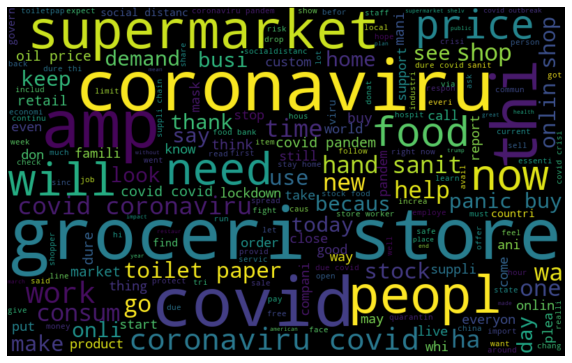

In [53]:
# create text from all tweets
all_words = ' '.join([text for text in df['Tweet']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

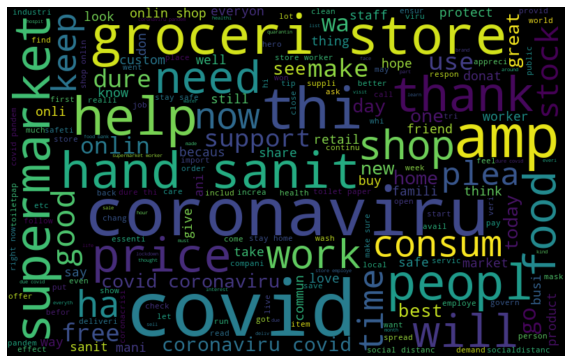

In [54]:
# create text from just normal tweets
normal_words = ' '.join([text for text in df['Tweet'][df['Sentiment'] == 'Extremely Positive']])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

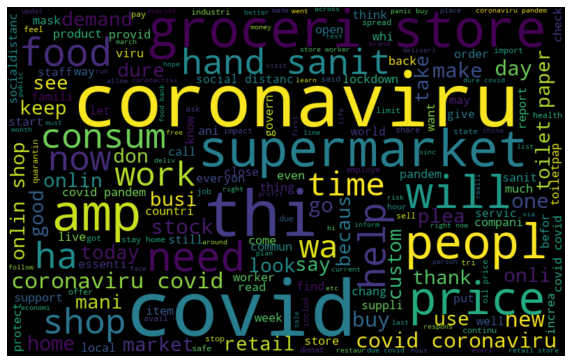

In [55]:
# create text from just normal tweets
normal_words = ' '.join([text for text in df['Tweet'][df['Sentiment'] == 'Positive']])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

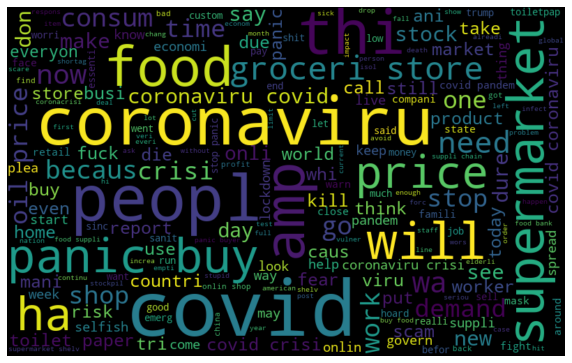

In [56]:
# create text from just normal tweets
normal_words = ' '.join([text for text in df['Tweet'][df['Sentiment'] == 'Extremely Negative']])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

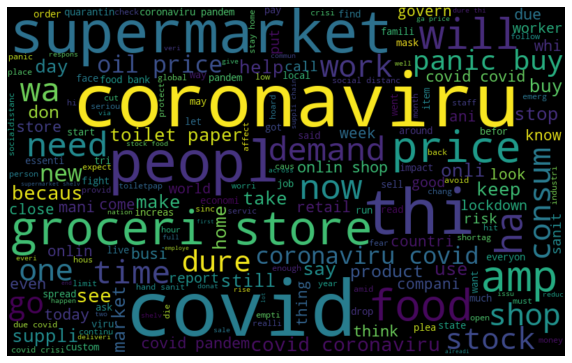

In [57]:
# create text from just normal tweets
normal_words = ' '.join([text for text in df['Tweet'][df['Sentiment'] == 'Negative']])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

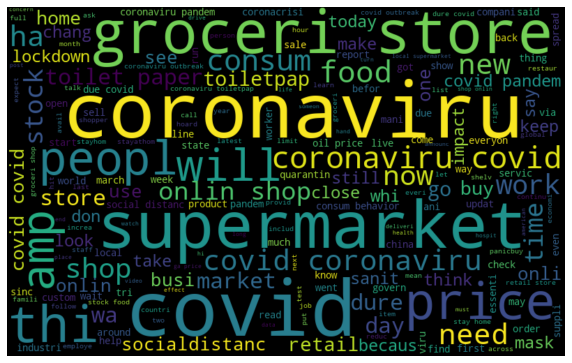

In [58]:
# create text from just normal tweets
normal_words = ' '.join([text for text in df['Tweet'][df['Sentiment'] == 'Neutral']])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

**D) Understanding the impact of Hashtags on tweets sentiment**

In [59]:
# function to collect hashtags
def hashtag_extract(x):
    hashtags = []
    for i in x:
        ht = re.findall(r'#(\w+)', i)
        hashtags.append(ht)
    return hashtags

In [60]:
# extracting hashtags from non racist/sexist tweets
HT_Extremely_Positive = hashtag_extract(df['OriginalTweet'][df['Sentiment'] == 'Extremely Positive'])
HT_Positive = hashtag_extract(df['OriginalTweet'][df['Sentiment'] == 'Positive'])
HT_Neutral = hashtag_extract(df['OriginalTweet'][df['Sentiment'] == 'Neutral'])
HT_Negative = hashtag_extract(df['OriginalTweet'][df['Sentiment'] == 'Negative'])
HT_Extremely_Negative = hashtag_extract(df['OriginalTweet'][df['Sentiment'] == 'Extremely Negative'])



# unnesting list
HT_Extremely_Positive = sum(HT_Extremely_Positive, [])
HT_Positive = sum(HT_Positive, [])
HT_Neutral = sum(HT_Neutral, [])
HT_Negative = sum(HT_Negative,[])
HT_Extremely_Negative = sum(HT_Extremely_Negative,[])

In [61]:
print(HT_Extremely_Positive)

['coronavirus', 'Covid_19', 'Dublin', 'Covid_19', 'COVID', 'Coronavirus', 'coronavirus', 'COVID19', 'bitcoin', 'coronavirus', 'coronavirus', 'coronavirus', 'coronavirus', 'EVEWrestling', 'CoronaVirus', 'COVID19', 'Trump', 'coronavirus', 'TrussellTrust', 'foodbanks', 'coronavirus', 'COVID19', 'coronavirus', 'COVID19', 'BLGPublication', 'USElections2020', 'COVID2019', 'OilWar', 'OOTT', 'coronavirus', 'COVID19ireland', 'COVID2019', 'BasicIncome', 'CdnPoli', 'COVID19', 'coronavirus', 'aadyasitara', 'aadya', 'sitara', 'coronavÃ', 'coronaaleart', 'covid_19', 'staysafe', 'sanitizer', 'covid', 'coronavirus', 'TCFD', 'coronavirus', 'FoodIsMedicine', 'COVID', 'COVID19seattle', 'KOMONews', 'coronavirus', 'CoronaVirusUpdate', 'therightcoffee', 'sanitizer', 'COVID2019', 'metroManilaCovid', 'coronavirus', 'coronavirus', 'coronavirus', 'pandemic', 'COVID2019', 'coronavirus', 'WhiteHouse', 'COVID2019', 'coronavirus', 'smartfoodservice', 'coronavirus', 'coronavirus', 'coronavirus', 'CoronaVirus', 'Coro

In [62]:
print(HT_Positive)

['Amazon', 'coronavirus', 'coronavirus', 'SuperTuesday', 'SuperTuesdsy', 'PowerTalk', 'Covid_19', 'SayEntrepreneur', 'DJSBU', 'B1', 'FBA', 'CoronavirusUSA', 'COVID', 'Coronavirus', 'UI', 'Unemployment', 'PaidLeaveForAll', 'seniors', 'disabled', 'vets', 'Covid_19', 'coronavirus', 'Coronavirus', 'COVID2019', 'COVID2019', 'panicbuying', 'coronavirus', 'Coronavirus', 'COVID19', 'retail', 'ecommerce', 'study', 'coronavirus', 'COVID2019', 'Coronavirus', 'COVID2019', 'Manchester', 'iwilleatwithyou', 'Retail', 'store', 'coronavirus', 'coronavirus', 'COVID19', 'coronavirus', 'complexhealth', 'Americans', 'coronavirus', 'COVID19Canada', 'CoronavirusCanada', 'bcseniors', 'coronavirus', 'bigW', 'eastgardens', 'Coronavirus', 'stimulus', 'auspol', 'coronavirus', 'sxsw', 'coronavirus', 'Coronavirus', 'CancelEverything', 'tending', 'COVID19', 'coronavirus', 'coronavirus', 'coronavirus', 'foodsecurity', '4', 'Apple', 'Coronavirus', 'LouisVuitton', 'coronavirus', 'quarantine', 'pandemic', 'Forex', 'fore

In [63]:
print(HT_Neutral)

['toiletpaper', 'dunnypaper', 'coronavirus', 'coronavirusaustralia', 'CoronaVirusUpdate', 'Covid_19', '9News', 'Corvid19', '7NewsMelb', 'dunnypapergate', 'Costco', 'coronavirus', 'COVID19', 'healthworkers', 'coronavirus', 'coronavirus', 'Brexit', 'foodrationing', 'coronavirus', 'covid19', 'Covid_19', 'coronavirus', 'corona', 'virus', 'panic', 'DowJones', 'CrudeOil', 'CoronaVirus', 'economy', 'CoronaVirusUpdates', 'Corona', 'CoronavirusOutbreak', 'virus', 'COVID2019', 'COVID19', 'NYC', 'coronavirus', 'COVID19', 'food', 'perishable', 'coronavirus', 'sanitizer', 'coronavirus', 'Coronavirus', 'investing', 'stocks', 'coronavirus', 'covid19', 'market', 'economy', 'CoronaVirus', 'toiletpaper', 'covid19', 'coronavirus', 'idiots', 'coronavirus', 'coronavirus', 'CoronaVirusUpdate', 'Bitcoin', 'COVID2019', 'scam', 'CPTSD', 'Coronavirus', 'Coronavirus', 'coronavirus', 'coronavirus', 'retail', 'CancelEverything', 'COVID19', 'Covid_19', 'coronavirus', 'coronavirusitalla', 'Philippines', 'COVID2019',

In [64]:
print(HT_Negative)

['Panic', 'NewYork', 'healthcare', 'BigApple', 'coronavirus', 'Bloomberg', 'QAnon', 'QAnon2018', 'QAnon2020', 'Election2020', 'CDC', 'CoronaVirus', 'COVID_19', 'PanicShopping', 'goods', 'FaceMasks', 'Blockchain', 'CryptoNews', 'toiletpaperpanic', 'coronavirus', 'covid19', 'coronavirus', 'coronavirus', 'COVID19', 'coronavirus', 'vaccinations', 'Coronavirus', 'ToiletPaper', 'CoronaVirus', 'coronavirus', 'coronavirus', 'Coronavirus', 'doomsdayBunker', 'coronavirus', 'COVID19', 'Trumpdemic', 'coronavirus', 'DonaldTrump', 'COVID19', 'Trumpdemic', 'coronaviru', 'earnings', 'coronavirus', 'TrustedData', 'Refinitiv', 'COVID19', 'COVID2019', 'remoteworking', 'broadband', 'rural', 'coronavirus', 'payrolltax', 'coronavirus', 'Covid_19', 'Coronavirus', 'ShippingContainers', 'MrBox', 'hamsterkÃ', 'COVID2019', 'covid19ireland', 'Coronavirusireland', 'panicbuyingireland', 'panicbuying', 'coronavirus', 'Coronavirus', 'trusselltrust', 'coronavirus', 'foodbanks', 'poverty', 'uk', 'COVID2019', 'coronavir

In [65]:
print(HT_Extremely_Negative)

['coronavirus', 'Covid_19', 'BeSafe', 'BeACascader', 'CoronavirusReachesDelhi', 'coronavirusindia', 'coronavirus', 'organic', 'Hamsterkauf', 'AirSewa', 'webchecin', 'coronavirus', 'Qanon', 'coronavirus', 'MMT', 'Gold', 'Silver', 'COVID2019', 'OPEC', 'COVID2019', 'Coronavirus', 'oil', 'migration', 'housingCrisis', 'Q', 'co', 'Coronavirus', 'BreakingNews', 'terrorists', 'coronavirus', 'toiletpaper', 'Oil', 'InterestRate', 'stimulus', 'coronavirus', 'COVID2019', 'coronavirus', 'Coronavirus', 'COVID2019', 'Coronavirus', 'Coronavirus', 'ad', 'coronavirus', 'prepper', 'BePrepared', 'Corona', 'CoronavirusOutbreak', 'Soldout', 'Coronavid19', 'wuhanvirus', 'CoronavirusUSA', 'COVID19', 'WuhanCoronavirus', 'toiletpaper', 'COVID2019', 'covid19UK', 'toiletpapercrisis', 'US', 'coronavirus', 'COVID19', 'coronavirus', 'COVID19', 'CoronavirusOutbreak', 'coronavirus', 'auspol', 'coronavirus', 'coronavirusau', 'coronavirus', 'Corona', 'CoronaVirusUpdate', 'COVID2019', 'handsanitizer', 'Jamaica', 'Lysol',

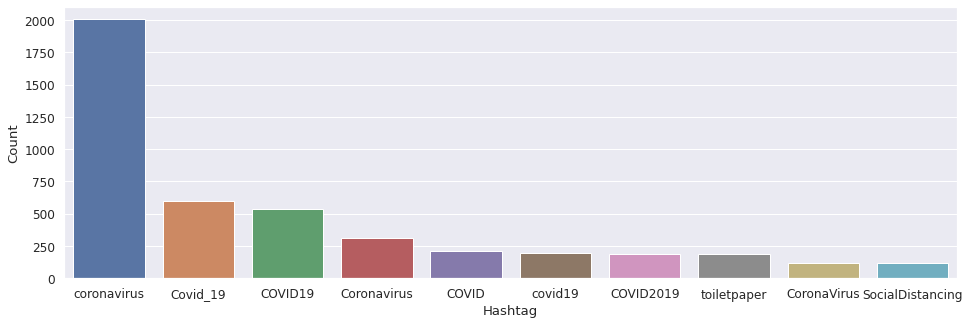

In [66]:
# making frequency distribution top 10 Extremely Positive hashtags
a = nltk.FreqDist(HT_Extremely_Positive)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count' : list(a.values())})

d = d.nlargest(columns = 'Count', n = 10)

plt.figure(figsize = (16,5))
ax = sns.barplot(data =d, x = 'Hashtag', y = 'Count')
plt.show()

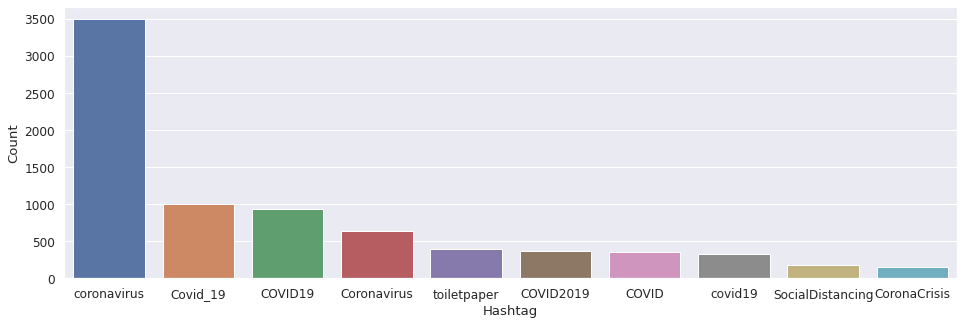

In [67]:
# making frequency distribution top 10 Positive hashtags
a = nltk.FreqDist(HT_Positive)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count' : list(a.values())})

d = d.nlargest(columns = 'Count', n = 10)

plt.figure(figsize = (16,5))
ax = sns.barplot(data =d, x = 'Hashtag', y = 'Count')
plt.show()

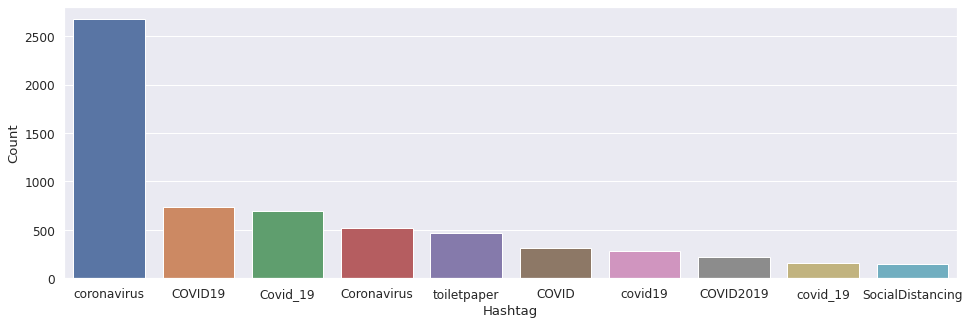

In [68]:
# making frequency distribution top 10 Neutral hashtags
a = nltk.FreqDist(HT_Neutral)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count' : list(a.values())})

d = d.nlargest(columns = 'Count', n = 10)

plt.figure(figsize = (16,5))
ax = sns.barplot(data =d, x = 'Hashtag', y = 'Count')
plt.show()

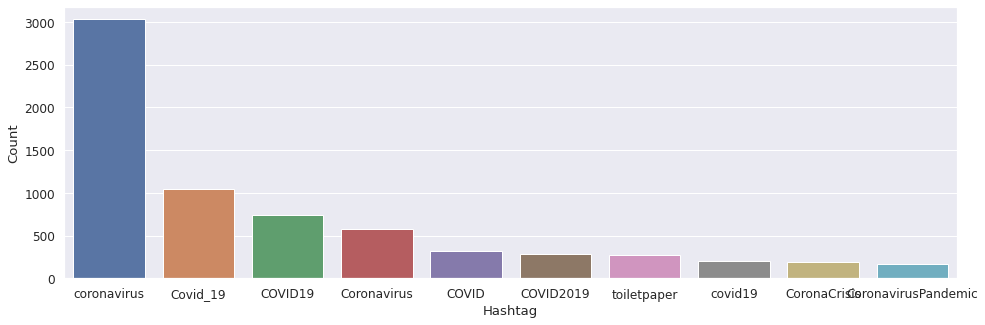

In [69]:
# making frequency distribution top 10 Negative hashtags
a = nltk.FreqDist(HT_Negative)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count' : list(a.values())})

d = d.nlargest(columns = 'Count', n = 10)

plt.figure(figsize = (16,5))
ax = sns.barplot(data =d, x = 'Hashtag', y = 'Count')
plt.show()

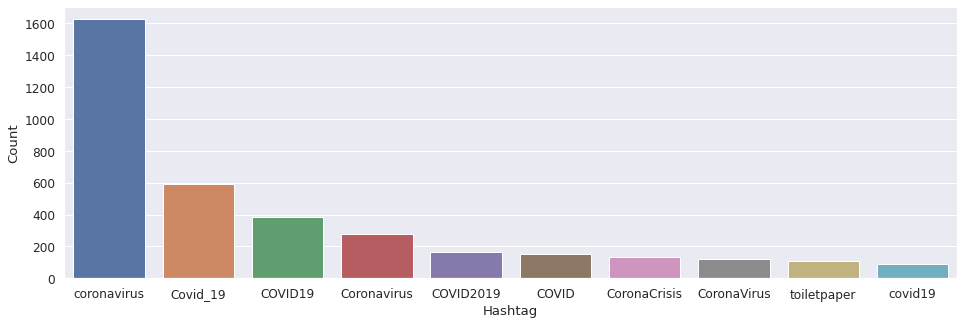

In [70]:
# making frequency distribution top 10 Extremely Extremely_Negative hashtags
a = nltk.FreqDist(HT_Extremely_Negative)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count' : list(a.values())})

d = d.nlargest(columns = 'Count', n = 10)

plt.figure(figsize = (16,5))
ax = sns.barplot(data =d, x = 'Hashtag', y = 'Count')
plt.show()

#**4. Extracting Features from Cleaned Tweets**

In [71]:
new_df = df[['Tweet','Sentiment']]

In [72]:
new_df.head()

,Tweet,Sentiment
0,trend new yorker encount empti supermarket shelv pictur wegman brooklyn sold out onlin grocer foodkick maxdeliveri #coronaviru fear shopper stock,Extremely Negative
1,when couldn find hand sanit fred meyer turn #amazon but for pack purel check out how #coronaviru concern are drive price,Positive
2,find out how you can protect yourself and love one from #coronaviru,Extremely Positive
3,#panic buy hit #newyork citi anxiou shopper stock food amp medic suppli after #healthcar worker her becom #bigappl confirm #coronaviru patient #bloomberg stage event,Negative
4,#toiletpap #dunnypap #coronaviru #coronavirusaustralia #coronavirusupd #covid new #corvid newsmelb #dunnypaperg #costco one week everyon buy babi milk powder the next everyon buy toilet paper,Neutral


In [73]:
df['Sentiment'].value_counts()

Positive              11344
Negative               9989
Neutral                7673
Extremely Positive     6664
Extremely Negative     5488
Name: Sentiment, dtype: int64

**Converting into lower case**

In [74]:
#new_df["Tweet"] = new_df["Tweet"].str.lower()#.str.split()

In [75]:
#new_df.head(5)

**Removing Stopwords**

In [76]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [77]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [78]:
new_df['Tweet'].apply(lambda x: [item for item in x if item not in stop])

0        [r, e, n,  , n, e, w,  , r, k, e, r,  , e, n, c, u, n,  , e, p,  , u, p, e, r, r, k, e,  , h, e, l, v,  , p, c, u, r,  , w, e, g, n,  , b, r, k, l, n,  , l,  , u,  , n, l, n,  , g, r, c, e, r,  , ...
1        [w, h, e, n,  , c, u, l, n,  , f, n,  , h, n,  , n,  , f, r, e,  , e, e, r,  , u, r, n,  , #, z, n,  , b, u,  , f, r,  , p, c, k,  , p, u, r, e, l,  , c, h, e, c, k,  , u,  , h, w,  , #, c, r, n, ...
2                                                                              [f, n,  , u,  , h, w,  , u,  , c, n,  , p, r, e, c,  , u, r, e, l, f,  , n,  , l, v, e,  , n, e,  , f, r,  , #, c, r, n, v, r, u]
3        [#, p, n, c,  , b, u,  , h,  , #, n, e, w, r, k,  , c,  , n, x, u,  , h, p, p, e, r,  , c, k,  , f,  , p,  , e, c,  , u, p, p, l,  , f, e, r,  , #, h, e, l, h, c, r,  , w, r, k, e, r,  , h, e, r, ...
4        [#, l, e, p, p,  , #, u, n, n, p, p,  , #, c, r, n, v, r, u,  , #, c, r, n, v, r, u, u, r, l,  , #, c, r, n, v, r, u, u, p,  , #, c, v,  , n, e, w,  , #, c

In [79]:
new_df.head(6)

,Tweet,Sentiment
0,trend new yorker encount empti supermarket shelv pictur wegman brooklyn sold out onlin grocer foodkick maxdeliveri #coronaviru fear shopper stock,Extremely Negative
1,when couldn find hand sanit fred meyer turn #amazon but for pack purel check out how #coronaviru concern are drive price,Positive
2,find out how you can protect yourself and love one from #coronaviru,Extremely Positive
3,#panic buy hit #newyork citi anxiou shopper stock food amp medic suppli after #healthcar worker her becom #bigappl confirm #coronaviru patient #bloomberg stage event,Negative
4,#toiletpap #dunnypap #coronaviru #coronavirusaustralia #coronavirusupd #covid new #corvid newsmelb #dunnypaperg #costco one week everyon buy babi milk powder the next everyon buy toilet paper,Neutral
5,you rememb the last time you paid gallon for regular ga lo angel price the pump are go down look how the #coronaviru impact price,Neutral


In [80]:
new_df.shape

(41158, 2)

In [81]:
new_df.isnull().sum()

Tweet        0
Sentiment    0
dtype: int64

In [82]:
new_df.head(7)

,Tweet,Sentiment
0,trend new yorker encount empti supermarket shelv pictur wegman brooklyn sold out onlin grocer foodkick maxdeliveri #coronaviru fear shopper stock,Extremely Negative
1,when couldn find hand sanit fred meyer turn #amazon but for pack purel check out how #coronaviru concern are drive price,Positive
2,find out how you can protect yourself and love one from #coronaviru,Extremely Positive
3,#panic buy hit #newyork citi anxiou shopper stock food amp medic suppli after #healthcar worker her becom #bigappl confirm #coronaviru patient #bloomberg stage event,Negative
4,#toiletpap #dunnypap #coronaviru #coronavirusaustralia #coronavirusupd #covid new #corvid newsmelb #dunnypaperg #costco one week everyon buy babi milk powder the next everyon buy toilet paper,Neutral
5,you rememb the last time you paid gallon for regular ga lo angel price the pump are go down look how the #coronaviru impact price,Neutral
6,vote the age #coronaviru hand sanit #supertuesday,Positive


# Spitting Our Dataset into Training And Testing Dataset ( For Multiclass Classification)

In [83]:
from sklearn.model_selection import train_test_split

train,valid = train_test_split(new_df,test_size = 0.2,random_state=0,stratify = new_df.Sentiment.values) #stratification means that the train_test_split method returns training and test subsets that have the same proportions of class labels as the input dataset.
print("train shape : ", train.shape)
print("valid shape : ", valid.shape)

train shape :  (32926, 2)
valid shape :  (8232, 2)


# Use Of Counter Vectorizer For Multi Class Classification

In [84]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
stop = list(stopwords.words('english'))
vectorizer = CountVectorizer(decode_error = 'replace',stop_words = stop)

X_train = vectorizer.fit_transform(train.Tweet.values)
X_test = vectorizer.transform(valid.Tweet.values)

y_train = train.Sentiment.values
y_test = valid.Sentiment.values

print("X_train.shape : ", X_train.shape)
print("X_train.shape : ", X_test.shape)
print("y_train.shape : ", y_train.shape)
print("y_test.shape : ", y_test.shape)

X_train.shape :  (32926, 27189)
X_train.shape :  (8232, 27189)
y_train.shape :  (32926,)
y_test.shape :  (8232,)


# KNN (k-nearest neighbors) classifier 

---



In [85]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3).fit(X_train, y_train)
  
# accuracy on X_test
accuracy = knn.score(X_test, y_test)
print(accuracy)

0.28620019436345967


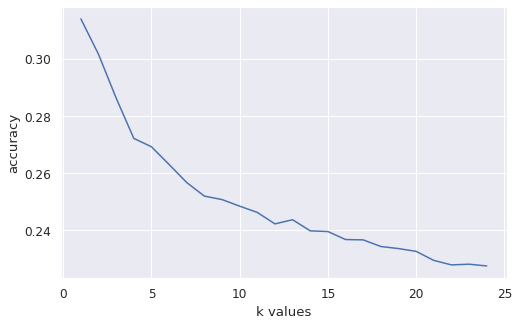

In [86]:
score_list = []
for each in range(1,25):
    knn2 = KNeighborsClassifier(n_neighbors = each)
    knn2.fit(X_train,y_train)
    score_list.append(knn2.score(X_test,y_test))
plt.figure(figsize=(8,5))    
plt.plot(range(1,25),score_list)
plt.xlabel("k values")
plt.ylabel("accuracy")
plt.show()

In [87]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1).fit(X_train, y_train)
  
# accuracy on X_test
accuracy = knn.score(X_test, y_test)
print(accuracy)

0.3138969873663751


#Light GBM Classification algorithm:

In [88]:
import lightgbm as lgb
 
# Similarly LGBMRegressor can also be imported for a regression model.
from lightgbm import LGBMClassifier

#LSTM algorithm:

In [89]:
new_df.head(2)

,Tweet,Sentiment
0,trend new yorker encount empti supermarket shelv pictur wegman brooklyn sold out onlin grocer foodkick maxdeliveri #coronaviru fear shopper stock,Extremely Negative
1,when couldn find hand sanit fred meyer turn #amazon but for pack purel check out how #coronaviru concern are drive price,Positive


In [90]:
#Mapping the target column to {Negative/Neutral/Positive}
target_mapping={'Extremely Negative':0, 'Negative':0, 'Neutral':1,
                'Positive':2, 'Extremely Positive':2}
new_df['SentimentMapped']=new_df['Sentiment'].map(lambda x:target_mapping[x])

new_df.head()

,Tweet,Sentiment,SentimentMapped
0,trend new yorker encount empti supermarket shelv pictur wegman brooklyn sold out onlin grocer foodkick maxdeliveri #coronaviru fear shopper stock,Extremely Negative,0
1,when couldn find hand sanit fred meyer turn #amazon but for pack purel check out how #coronaviru concern are drive price,Positive,2
2,find out how you can protect yourself and love one from #coronaviru,Extremely Positive,2
3,#panic buy hit #newyork citi anxiou shopper stock food amp medic suppli after #healthcar worker her becom #bigappl confirm #coronaviru patient #bloomberg stage event,Negative,0
4,#toiletpap #dunnypap #coronaviru #coronavirusaustralia #coronavirusupd #covid new #corvid newsmelb #dunnypaperg #costco one week everyon buy babi milk powder the next everyon buy toilet paper,Neutral,1


In [96]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Embedding, SpatialDropout1D
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping


model=Sequential()
model.add(Embedding(input_dim=MAX_NB_WORDS, output_dim=64, input_length=X_train_seq_padded.shape[1]))
#input_dim: Size of the vocabulary.
#output_dim: Dimension of the dense embedding.

model.add(SpatialDropout1D(0.4))
model.add(LSTM(128, activation='relu', dropout=0.2, recurrent_dropout=0.2, return_sequences=True))

model.add(LSTM(128, activation='relu', dropout=0.2, recurrent_dropout=0.2, return_sequences=True))

model.add(LSTM(128, activation='relu', dropout=0.2, recurrent_dropout=0.2))

model.add(Dense(3, activation='softmax'))

model.summary()

NameError: ignored

In [93]:
from sklearn.model_selection import train_test_split
X=new_df['Tweet']
y=new_df['SentimentMapped']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42,stratify=y)


In [95]:
new_df.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=120,batch_size=64)

AttributeError: ignored